## House Price Prediction Base on Boston House Price

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [21]:
column_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','price']
data=pd.read_csv('./housing.csv',sep='\s+',names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
data.shape

(506, 14)

## Check Number Of Missing Values

In [24]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

## Continue

In [25]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
X=data.drop('price',axis=1)
Y=data['price']


In [27]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [28]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

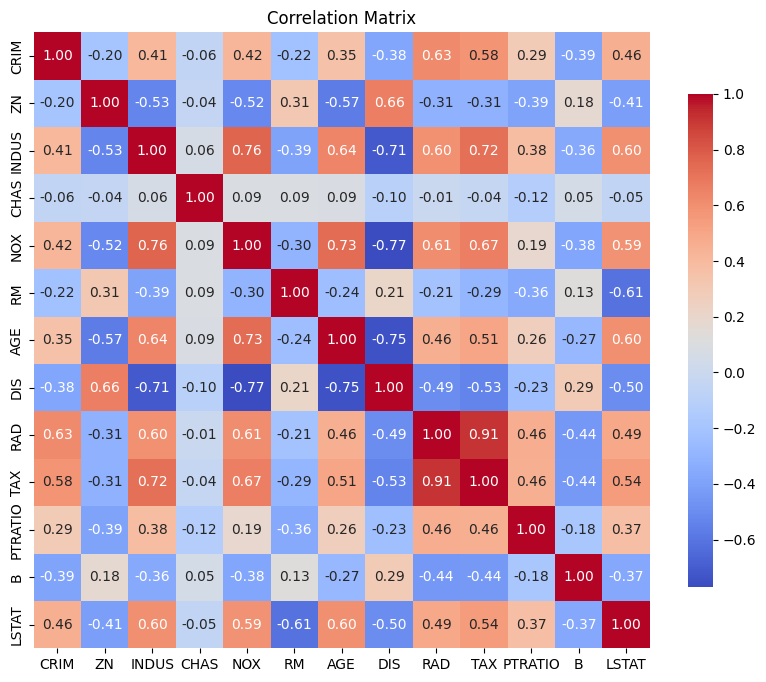

In [ ]:
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.show()

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Model - XGBoost Regressor

In [33]:
model=XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
model.fit(X_train,Y_train)
## Prediction
Y_pred=model.predict(X_test)
Y_pred

array([24.276764 , 30.46075  , 17.959005 , 22.965069 , 17.133715 ,
       22.163433 , 18.669397 , 15.236069 , 21.046127 , 20.459925 ,
       22.439089 , 18.89959  , 11.203732 , 21.811333 , 18.655327 ,
       26.25912  , 21.139784 ,  9.210471 , 47.378334 , 15.913627 ,
       25.087412 , 26.079153 , 13.452615 , 21.082066 , 15.193554 ,
       15.992098 , 20.690847 , 13.094459 , 21.131876 , 21.168287 ,
       18.848736 , 23.033901 , 14.877705 , 21.35931  , 15.263533 ,
       14.96528  , 33.754707 , 19.01804  , 22.69863  , 24.285683 ,
       19.455326 , 27.735622 , 47.043087 , 19.217285 , 21.663893 ,
       14.770664 , 13.908811 , 23.762539 , 17.538256 , 25.872328 ,
       22.392021 , 35.081337 , 17.318087 , 27.144457 , 45.176407 ,
       21.917618 , 16.05219  , 30.757784 , 22.377308 , 19.42954  ,
       25.34448  , 34.943123 , 30.451046 , 17.93282  , 25.573687 ,
       17.035986 , 14.910609 , 22.595358 , 27.416218 , 14.8786125,
       20.446955 , 30.664629 ,  9.616146 , 21.455444 , 22.9409

## Evaluation

### R squared Error

In [36]:
r2_score=metrics.r2_score(Y_test,Y_pred)
r2_score

0.9057837838492537

### Mean Absloute Error

In [37]:
mean_absolute_error=metrics.mean_absolute_error(Y_test,Y_pred)
mean_absolute_error

1.8908873698290656

## Visualize Prediction

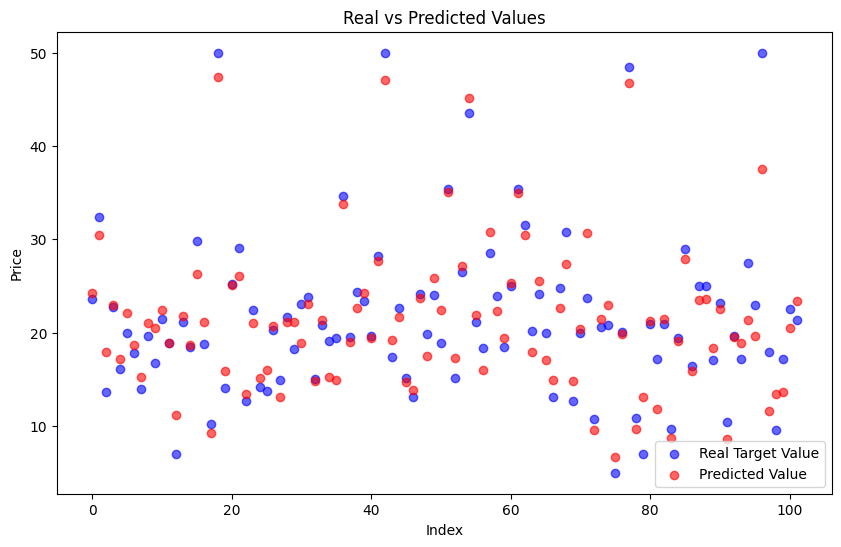

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test.values, label='Real Target Value', color='b', alpha=0.6)
plt.scatter(range(len(Y_pred)), Y_pred, label='Predicted Value', color='r', alpha=0.6)
plt.title('Real vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()